In [1]:
from airfoil_NUFT import *
import torch
from torch.utils.data import Dataset, DataLoader
os.environ["CUDA_VISIBLE_DEVICES"]="0"
import numpy as np
import pandas as pd
import os
import csv

In [28]:
V=np.array([[0.390625  , 0.13189413],
       [0.40625   , 0.12743914],
       [0.421875  , 0.13051544],
       [0.43490809, 0.140625  ],
       [0.4375    , 0.1439682 ],
       [0.44621728, 0.15625   ],
       [0.453125  , 0.16675084],
       [0.45772687, 0.171875  ],
       [0.4683706 , 0.1875    ],
       [0.46875   , 0.18825443],
       [0.47384   , 0.203125  ],
       [0.47852529, 0.21875   ],
       [0.48385424, 0.234375  ],
       [0.484375  , 0.23687316],
       [0.48758923, 0.25      ],
       [0.4872929 , 0.265625  ],
       [0.48670004, 0.28125   ],
       [0.49056819, 0.296875  ],
       [0.49857929, 0.3125    ],
       [0.5       , 0.31569776],
       [0.50486591, 0.328125  ],
       [0.50616201, 0.34375   ],
       [0.50556822, 0.359375  ],
       [0.50726676, 0.375     ],
       [0.51163141, 0.390625  ],
       [0.515625  , 0.4020488 ],
       [0.51722813, 0.40625   ],
       [0.52348307, 0.421875  ],
       [0.53125   , 0.43733195],
       [0.53135922, 0.4375    ],
       [0.53898844, 0.453125  ],
       [0.54304262, 0.46875   ],
       [0.54523671, 0.484375  ],
       [0.546875  , 0.49364051],
       [0.54800892, 0.5       ],
       [0.55275892, 0.515625  ],
       [0.55958605, 0.53125   ],
       [0.5625    , 0.5362226 ],
       [0.56907917, 0.546875  ],
       [0.578125  , 0.56243807],
       [0.5781612 , 0.5625    ],
       [0.58410462, 0.578125  ],
       [0.58526755, 0.59375   ],
       [0.5834782 , 0.609375  ],
       [0.58269907, 0.625     ],
       [0.58541332, 0.640625  ],
       [0.59087942, 0.65625   ],
       [0.59375   , 0.66517131],
       [0.59583428, 0.671875  ],
       [0.59881571, 0.6875    ],
       [0.60364567, 0.703125  ],
       [0.609375  , 0.71255845],
       [0.61352049, 0.71875   ],
       [0.62088759, 0.734375  ],
       [0.62440116, 0.75      ],
       [0.625     , 0.75329199],
       [0.62726118, 0.765625  ],
       [0.63292563, 0.78125   ],
       [0.63938812, 0.796875  ],
       [0.640625  , 0.80773889],
       [0.64125176, 0.8125    ],
       [0.640625  , 0.81437344],
       [0.63579852, 0.828125  ],
       [0.625     , 0.83698321],
       [0.609375  , 0.83945934],
       [0.59375   , 0.83331048],
       [0.58891026, 0.828125  ],
       [0.58173523, 0.8125    ],
       [0.57904655, 0.796875  ],
       [0.57843628, 0.78125   ],
       [0.578125  , 0.77901336],
       [0.57629222, 0.765625  ],
       [0.57078131, 0.75      ],
       [0.5625    , 0.73535745],
       [0.56179182, 0.734375  ],
       [0.55204703, 0.71875   ],
       [0.54716112, 0.703125  ],
       [0.546875  , 0.70142362],
       [0.54455151, 0.6875    ],
       [0.54045964, 0.671875  ],
       [0.53216307, 0.65625   ],
       [0.53125   , 0.65481116],
       [0.52376407, 0.640625  ],
       [0.51966879, 0.625     ],
       [0.51717721, 0.609375  ],
       [0.515625  , 0.60065139],
       [0.51390957, 0.59375   ],
       [0.50898665, 0.578125  ],
       [0.5046984 , 0.5625    ],
       [0.50148507, 0.546875  ],
       [0.5       , 0.5421934 ],
       [0.49649033, 0.53125   ],
       [0.48868987, 0.515625  ],
       [0.484375  , 0.50841664],
       [0.47894293, 0.5       ],
       [0.47189352, 0.484375  ],
       [0.46875   , 0.47500356],
       [0.46639003, 0.46875   ],
       [0.46192188, 0.453125  ],
       [0.45878677, 0.4375    ],
       [0.45649413, 0.421875  ],
       [0.453125  , 0.4064507 ],
       [0.45307956, 0.40625   ],
       [0.44679739, 0.390625  ],
       [0.43834571, 0.375     ],
       [0.4375    , 0.37310347],
       [0.43082611, 0.359375  ],
       [0.42793419, 0.34375   ],
       [0.4258682 , 0.328125  ],
       [0.421875  , 0.314167  ],
       [0.42145956, 0.3125    ],
       [0.41685591, 0.296875  ],
       [0.41368339, 0.28125   ],
       [0.41089709, 0.265625  ],
       [0.40654561, 0.25      ],
       [0.40625   , 0.24920139],
       [0.39897845, 0.234375  ],
       [0.39134248, 0.21875   ],
       [0.390625  , 0.21716711],
       [0.38568576, 0.203125  ],
       [0.38094447, 0.1875    ],
       [0.37765983, 0.171875  ],
       [0.37733302, 0.15625   ],
       [0.3820937 , 0.140625  ]])
E=np.array([[  0,   1],
       [  1,   2],
       [  2,   3],
       [  3,   4],
       [  4,   5],
       [  5,   6],
       [  6,   7],
       [  7,   8],
       [  8,   9],
       [  9,  10],
       [ 10,  11],
       [ 11,  12],
       [ 12,  13],
       [ 13,  14],
       [ 14,  15],
       [ 15,  16],
       [ 16,  17],
       [ 17,  18],
       [ 18,  19],
       [ 19,  20],
       [ 20,  21],
       [ 21,  22],
       [ 22,  23],
       [ 23,  24],
       [ 24,  25],
       [ 25,  26],
       [ 26,  27],
       [ 27,  28],
       [ 28,  29],
       [ 29,  30],
       [ 30,  31],
       [ 31,  32],
       [ 32,  33],
       [ 33,  34],
       [ 34,  35],
       [ 35,  36],
       [ 36,  37],
       [ 37,  38],
       [ 38,  39],
       [ 39,  40],
       [ 40,  41],
       [ 41,  42],
       [ 42,  43],
       [ 43,  44],
       [ 44,  45],
       [ 45,  46],
       [ 46,  47],
       [ 47,  48],
       [ 48,  49],
       [ 49,  50],
       [ 50,  51],
       [ 51,  52],
       [ 52,  53],
       [ 53,  54],
       [ 54,  55],
       [ 55,  56],
       [ 56,  57],
       [ 57,  58],
       [ 58,  59],
       [ 59,  60],
       [ 60,  61],
       [ 61,  62],
       [ 62,  63],
       [ 63,  64],
       [ 64,  65],
       [ 65,  66],
       [ 66,  67],
       [ 67,  68],
       [ 68,  69],
       [ 69,  70],
       [ 70,  71],
       [ 71,  72],
       [ 72,  73],
       [ 73,  74],
       [ 74,  75],
       [ 75,  76],
       [ 76,  77],
       [ 77,  78],
       [ 78,  79],
       [ 79,  80],
       [ 80,  81],
       [ 81,  82],
       [ 82,  83],
       [ 83,  84],
       [ 84,  85],
       [ 85,  86],
       [ 86,  87],
       [ 87,  88],
       [ 88,  89],
       [ 89,  90],
       [ 90,  91],
       [ 91,  92],
       [ 92,  93],
       [ 93,  94],
       [ 94,  95],
       [ 95,  96],
       [ 96,  97],
       [ 97,  98],
       [ 98,  99],
       [ 99, 100],
       [100, 101],
       [101, 102],
       [102, 103],
       [103, 104],
       [104, 105],
       [105, 106],
       [106, 107],
       [107, 108],
       [108, 109],
       [109, 110],
       [110, 111],
       [111, 112],
       [112, 113],
       [113, 114],
       [114, 115],
       [115, 116],
       [116, 117],
       [117, 118],
       [118, 119],
       [119, 120],
       [120, 121],
       [121, 122],
       [122, 123],
       [123,   0]])

V=torch.tensor(V,dtype=torch.float64)
E=torch.LongTensor(E)
D = torch.ones(E.shape[0], 1, dtype=V.dtype)


AttributeError: 'Tensor' object has no attribute 'ndim'

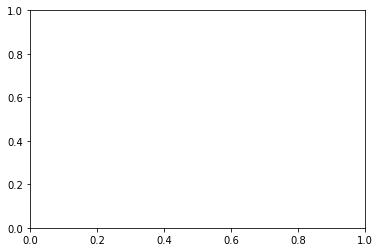

In [29]:
plt.plot(V[:,0],V[:,1])

(-0.5, 27.5, 27.5, -0.5)

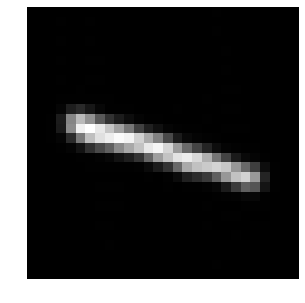

In [31]:
ddsl_phys=DDSL_phys((28,28),(1,1),j=2)
f = ddsl_phys(V,E,D)
fig=plt.figure(figsize=(10, 5))
ax1=fig.add_subplot(111)
im1=ax1.imshow(torch.squeeze(f).detach().cpu().numpy(), origin='upper', cmap='gray')
ax1.axis('off')

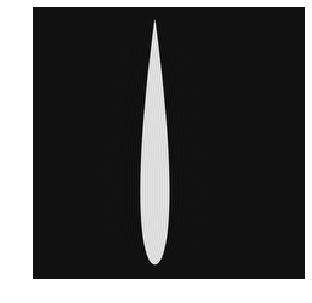

In [9]:
f=airfoil_phys('n0012', (224,224))
fig=plt.figure(figsize=(10, 5))
ax1=fig.add_subplot(111)
im1=ax1.imshow(torch.squeeze(f).detach().cpu().numpy(), origin='lower', cmap='gray')
ax1.axis('off')
plt.savefig('airfoil_ddsl.png')

In [103]:
class TestDataset(Dataset):
    def __init__(self, csv_file, shape_dir, set_type, train_size=0.7, test_size=0.2, random_seed=0):
        '''
        Args:
            csv_file (string): Path to csv file with CFD data for each airfoil.
            shape_dir (string): Directory containing airfoil shape files (.npy).
        '''
        
        assert (set_type in ['train', 'test', 'valid'])
        
        # Load data
        df=pd.read_csv(csv_file).drop('Unnamed: 0', axis=1)
        
        # Set random seed
        np.random.seed(random_seed)

        data_size=len(df)

        idx_arr=np.arange(0,data_size)
        np.random.shuffle(idx_arr)

        num_train=np.round(train_size*data_size).astype('int')
        num_test=np.round(test_size*data_size).astype('int')
        
        # Split dataset
        idx=0
        if set_type=='train':
            idx=idx_arr[:num_train]
        elif set_type=='test':
            idx=idx_arr[num_train:num_train+num_test]
        elif set_type=='valid':
            idx=idx_arr[num_train+num_test:]
        self.airfoil_df=df.iloc[idx]
        
        self.shape_dir=shape_dir
        
    def __len__(self):
        return len(self.airfoil_df)
    
    def __getitem__(self, idx):    
        # Get CFD info from dataframe
        name=self.airfoil_df['Name'].iloc[idx]
        Re=self.airfoil_df['Re'].iloc[idx]
        Cl=self.airfoil_df['Cl'].iloc[idx]
        Cd=self.airfoil_df['Cd'].iloc[idx]
        ClCd=self.airfoil_df['Cl/Cd'].iloc[idx]
        aoa=self.airfoil_df['AoA'].iloc[idx]
        
        # Get numpy shape file
        af_dir=self.airfoil_df['Directory'].iloc[idx]
        shape_dir=self.shape_dir
        shape_file=shape_dir+'/'+af_dir+'.pt'
        shape=torch.load(shape_file).detach()
#         shape=np.stack((np.real(shape), np.imag(shape)), axis=2)
          
        # Create dictionary output
        sample={'name': name,\
                'shape': shape,\
                'Re': Re,\
                'Cl': Cl,\
                'Cd': Cd,\
                'Cl/Cd': ClCd,\
                'aoa': aoa\
               }
        
        return sample

In [104]:
trainset=TestDataset(csv_file='processed_data/airfoil_data_normalized.csv', shape_dir='processed_data', set_type='train')
trainloader = DataLoader(trainset, batch_size=512, shuffle=True, num_workers=12, pin_memory=True)

In [105]:
trainset[0]['shape']

tensor([[[-9.9736e-06,  1.0481e-05, -1.1866e-05,  ...,  6.8448e-06,
          -8.0979e-06,  8.6561e-06],
         [ 1.0510e-05, -1.1072e-05,  1.2511e-05,  ..., -7.2182e-06,
           8.5253e-06, -9.1378e-06],
         [-1.1172e-05,  1.1800e-05, -1.3306e-05,  ...,  7.6838e-06,
          -9.0563e-06,  9.7342e-06],
         ...,
         [ 9.0056e-06, -9.4046e-06,  1.0680e-05,  ..., -6.2007e-06,
           7.3461e-06, -7.7964e-06],
         [-9.2251e-06,  9.6518e-06, -1.0955e-05,  ...,  6.3377e-06,
          -7.5106e-06,  7.9883e-06],
         [ 9.5480e-06, -1.0011e-05,  1.1350e-05,  ..., -6.5529e-06,
           7.7616e-06, -8.2752e-06]]], dtype=torch.float64)

In [107]:
for i, data in enumerate(trainloader,0):
    print(data['shape'].shape)
    if i>3:
        break

torch.Size([512, 1, 224, 224])
torch.Size([512, 1, 224, 224])
torch.Size([512, 1, 224, 224])
torch.Size([512, 1, 224, 224])
torch.Size([512, 1, 224, 224])


In [ ]:
print(torch.cuda.is_available())
print(torch.cuda.device_count())

In [2]:
V,E,D=construct_VED('n0012','cuda')
E
# V=V.detach().cpu().numpy()
# plt.plot(V[:,0], V[:,1])

[[  0   1]
 [  1   2]
 [  2   3]
 [  3   4]
 [  4   5]
 [  5   6]
 [  6   7]
 [  7   8]
 [  8   9]
 [  9  10]
 [ 10  11]
 [ 11  12]
 [ 12  13]
 [ 13  14]
 [ 14  15]
 [ 15  16]
 [ 16  17]
 [ 17  18]
 [ 18  19]
 [ 19  20]
 [ 20  21]
 [ 21  22]
 [ 22  23]
 [ 23  24]
 [ 24  25]
 [ 25  26]
 [ 26  27]
 [ 27  28]
 [ 28  29]
 [ 29  30]
 [ 30  31]
 [ 31  32]
 [ 32  33]
 [ 33  34]
 [ 34  35]
 [ 35  36]
 [ 36  37]
 [ 37  38]
 [ 38  39]
 [ 39  40]
 [ 40  41]
 [ 41  42]
 [ 42  43]
 [ 43  44]
 [ 44  45]
 [ 45  46]
 [ 46  47]
 [ 47  48]
 [ 48  49]
 [ 49  50]
 [ 50  51]
 [ 51  52]
 [ 52  53]
 [ 53  54]
 [ 54  55]
 [ 55  56]
 [ 56  57]
 [ 57  58]
 [ 58  59]
 [ 59  60]
 [ 60  61]
 [ 61  62]
 [ 62  63]
 [ 63  64]
 [ 64  65]
 [ 65  66]
 [ 66  67]
 [ 67  68]
 [ 68  69]
 [ 69  70]
 [ 70  71]
 [ 71  72]
 [ 72  73]
 [ 73  74]
 [ 74  75]
 [ 75  76]
 [ 76  77]
 [ 77  78]
 [ 78  79]
 [ 79  80]
 [ 80  81]
 [ 81  82]
 [ 82  83]
 [ 83  84]
 [ 84  85]
 [ 85  86]
 [ 86  87]
 [ 87  88]
 [ 88  89]
 [ 89  90]
 [ 90  91]

TypeError: ones(): argument 'dtype' must be torch.dtype, not numpy.dtype

In [11]:
test=torch.squeeze(F).detach().cpu().numpy()
test.shape

(224, 113, 2)

In [9]:
F

tensor([[[[ 3.3399e+03,  3.3399e+03]],

         [[-3.1083e+03, -1.0961e+03]],

         [[ 2.4659e+03,  1.9862e+03]],

         ...,

         [[-1.5502e+01,  6.6496e+00]],

         [[ 1.3111e+01, -8.1224e-01]],

         [[-7.5814e+00, -2.2366e+00]]],


        [[[-9.7595e+02, -7.0804e+02]],

         [[ 6.7477e+02,  9.6815e+02]],

         [[-3.0974e+02, -1.0606e+03]],

         ...,

         [[ 1.4461e+01,  1.1075e+01]],

         [[-8.1141e+00, -1.1665e+01]],

         [[ 2.9234e+00,  8.3378e+00]]],


        [[[-3.8518e+02, -1.3882e+02]],

         [[ 3.1152e+02,  2.6047e+02]],

         [[-1.9032e+02, -3.4767e+02]],

         ...,

         [[ 4.4159e+00, -1.5221e+01]],

         [[-6.1204e+00,  9.1330e+00]],

         [[ 3.8395e+00, -3.3160e+00]]],


        ...,


        [[[-2.0401e+02,  1.9581e+01]],

         [[ 1.9889e+02,  4.7246e+01]],

         [[-1.7381e+02, -1.0445e+02]],

         ...,

         [[-1.0553e+01,  4.1276e+00]],

         [[ 5.6820e+00,  1.5530e+00]],
